 # Intercycle Project: Simulation
 
 #### Carlos Cardoso - Edith Guaraca

## Support environments for the development of simulations: simulation of a warehouse.

##### 1. Simpy installation
SimPy is implemented in pure Python and has no dependencies. SimPy runs on Python 2 (>= 2.7) and Python 3 (>= 3.2). We will show how to do it through the creation of a virtual environment.

##### 2. Steps to follow:

*We created the virtual environment called "simulation" with version 3.4 of Python:

            - conda create --name simulation python = 3.4
            - Install simpy in the created environment:
            - conda install - simpy simulation

*We activate the virtual environment "simulation" and install ipykernel to be able to select the python kernel with which we will work (in the notebooks of Jupyter Notebook):

            - source activate simulation
            - pip install ipykernel
            - python -m ipykernel install --user --name simulation --display-name "python 3.4-simulation"

#####  *SimPy es un marco de simulación de eventos discretos basado en procesos basado en Python estándar . Su despachador de eventos se basa en los generadores de Python y también se puede usar para redes asíncronas o para implementar sistemas multiagentes (con comunicación tanto simulada como real).
##### *Random es un módulo que implementa generadores de números pseudoaleatorios para varias distribuciones.
#### *NumPy is an extension of Python, which adds greater support for vectors and matrices, constituting a library of high-level mathematical functions to operate with those vectors or matrices.
#### *Matplotlib is a library for the generation of graphics from data contained in lists or arrays in the Python programming language and its mathematical extension NumPy.

# Development of the simulation

Next we proceed to develop the simulation.

* We import the necessary libraries
* We establish the required parameters:

        -Variables of interest
        -Simulation time
        -Initialization parameters

In [1]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as pp

%matplotlib inline


num_vendedores=3
num_vestidores=1
num_sala_compra=3
num_cajas=2

clientes = 100
ninos=0.35*clientes
adultos=0.65*clientes

print("Clientes ninos",ninos)
print("Clientes adultos",adultos)

print()

tipo_cliente = np.arange(2)
tipo_sala_compra=np.arange(3)
cliente_compraSN=np.arange(2)
tipo_pago = np.arange(2)




Clientes ninos 35.0
Clientes adultos 65.0



>>>>Llega adulto a la tienda t = 0
>>>>Llega niño a la tienda t = 0
>>>>Llega adulto a la tienda t = 0
Pasa adulto a comprar ternos t = 13
Pasa adulto a comprar ropa normal t = 17
Pasa niño a comprar ropa normal t = 21
Adulto escoge su terno t = 29
Niño escoge ropa normal t = 38
Pasa adulto a probarse terno t = 40
Adulto escoge ropa normal t = 42
Sale adulto de vestidor: se probo el terno  t = 56
Adulto quiere terno t = 56
Adulto va a pagar de terno  t = 72
Paga adulto de terno en efectivo t = 120
Sale adulto del almacen t = 129
Pasa adulto a comprar ternos t = 129
Pasa niño a probarse ropa normal t = 129
Sale niño de vestidor: se probo ropa normal  t = 141
Adulto escoge su terno t = 142
Niño no quiere ropa normal t = 151
Niño sale del almacen  t = 170
Paga niño de ropa normal con tarjeta t = 198
Sale niño del almacen t = 208
Pasa adulto a probarse ropa normal t = 208
>>>>Llega adulto a la tienda t = 208
Sale adulto de vestidor: se probo ropa normal  t = 221
Adulto no quiere ropa norma

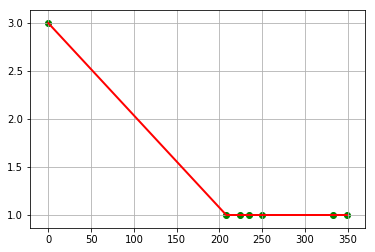

In [136]:
tiempo={}

class Almacen(object):  
    
    def __init__(self, environment, num_sala_compra, num_vestidores, num_cajas, tiempo):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment        
        self.sala_compra= simpy.Resource(environment, num_sala_compra)
        self.vestidor= simpy.Resource(environment, num_vestidores)
        self.caja= simpy.Resource(environment, num_cajas)
        self.tiempo= tiempo    
        
    # servicio_cliente is a method that executes the enter_vestidor process
    def atender_cliente(self, tipo_cliente, tipo_sala_compra,cliente_compraSN,  tipo_pago,almacen):
        
        if tipo_sala_compra==0 and tipo_cliente==0:
            print('Pasa niño a comprar ropa normal t =',self.env.now)           
            yield self.env.timeout(random.randint(10,30))
            print('Niño escoge ropa normal t =',self.env.now)
            yield self.env.timeout(random.randint(10,40))
            yield env.process(entrar_vestidor(env,tipo_cliente, tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))
           
        if tipo_sala_compra==1 and tipo_cliente==0:
            print('Pasa niño a comprar ternos t =',self.env.now)
            yield self.env.timeout(random.randint(10,30))
            print('Niño escoge su terno t =',self.env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(entrar_vestidor(env,tipo_cliente, tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))
           
        if tipo_sala_compra==3 and tipo_cliente==0:
            print('Pasa niño a comprar zapatos t =',self.env.now)           
            yield self.env.timeout(random.randint(10,30))
            print('Niño escoge sus zapatos t =',self.env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(entrar_vestidor(env,tipo_cliente, tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))
            
#-------------------------------------------------------------------------------------------------------
            
        if tipo_sala_compra==0 and tipo_cliente==1:
            print('Pasa adulto a comprar ropa normal t =',self.env.now)           
            yield self.env.timeout(random.randint(10,30))
            print('Adulto escoge ropa normal t =',self.env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(entrar_vestidor(env,tipo_cliente, tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))
            
            
        if tipo_sala_compra==1 and tipo_cliente==1:
            print('Pasa adulto a comprar ternos t =',self.env.now)
            yield self.env.timeout(random.randint(10,30))
            print('Adulto escoge su terno t =',self.env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(entrar_vestidor(env,tipo_cliente, tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))
            
        if tipo_sala_compra==3 and tipo_cliente==1:
            print('Pasa adulto a comprar zapatos t =',self.env.now)           
            yield self.env.timeout(random.randint(10,30))
            print('Adulto escoge sus zapatos t =',self.env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(entrar_vestidor(env,tipo_cliente, tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))
            
#-------------------------------------------------------------------------------------------------------
            
        if tipo_sala_compra==0 and tipo_cliente==1:
            print('Pasa adulto a comprar ropa normal t =',self.env.now)           
            yield self.env.timeout(random.randint(10,30))
            print('Adulto escoge ropa normal t =',self.env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(entrar_vestidor(env,tipo_cliente, tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))
            
        if tipo_sala_compra==1 and tipo_cliente==1:
            print('Pasa adulto a comprar ternos t =',self.env.now)
            yield self.env.timeout(random.randint(10,30))
            print('Adulto escoge su terno t =',self.env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(entrar_vestidor(env,tipo_cliente, tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))
            
        
        if tipo_sala_compra==3 and tipo_cliente==1:
            print('Pasa adulto a comprar zapatos t =',self.env.now)           
            yield self.env.timeout(random.randint(10,30))
            print('Adulto escoge sus zapatos t =',self.env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(entrar_vestidor(env,tipo_cliente, tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))
            
    # comprarSN is a method that represents if the client decides to buy or not and executes the process pay_box       
    def comprarSN(self, tipo_cliente, tipo_sala_compra,cliente_compraSN,tipo_pago,almacen): 
        
        if tipo_sala_compra==0 and tipo_cliente==0 and cliente_compraSN==0:
            print('Niño quiere ropa normal t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Niño va a pagar de ropa normal  t =',env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(pagar_caja(env,tipo_cliente,tipo_sala_compra, tipo_pago, almacen))
             
        if tipo_sala_compra==1 and tipo_cliente==0 and cliente_compraSN==0:
            print('Niño quiere terno t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Niño va a pagar de terno  t =',env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(pagar_caja(env,tipo_cliente,tipo_sala_compra, tipo_pago, almacen))

        if tipo_sala_compra==3 and tipo_cliente==0 and cliente_compraSN==0:
            print('Niño quiere los zapatos t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Niño va a pagar los zapatos  t =',env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(pagar_caja(env,tipo_cliente,tipo_sala_compra, tipo_pago, almacen))
            
    #------------------------------nino no compra------------------
        if tipo_sala_compra==0 and tipo_cliente==0 and cliente_compraSN==1:
            print('Niño no quiere ropa normal t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Niño sale del almacen  t =',env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(pagar_caja(env,tipo_cliente,tipo_sala_compra, tipo_pago, almacen))
             
        if tipo_sala_compra==1 and tipo_cliente==0 and cliente_compraSN==1:
            print('Niño no quiere terno t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Niño sale del almacen t =',env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(pagar_caja(env,tipo_cliente,tipo_sala_compra, tipo_pago, almacen))

        if tipo_sala_compra==3 and tipo_cliente==0 and cliente_compraSN==1:
            print('Niño no quiere los zapatos t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Niño sale del almacen  t =',env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(pagar_caja(env,tipo_cliente,tipo_sala_compra, tipo_pago, almacen))
            
#-----------------------------ClienteAdulto------------------------------------------------------------------------------  
        
        if tipo_sala_compra==0 and tipo_cliente==1 and cliente_compraSN==0:
            print('Adulto quiere ropa normal t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Adulto va a pagar de ropa normal  t =',env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(pagar_caja(env,tipo_cliente,tipo_sala_compra, tipo_pago, almacen))

        if tipo_sala_compra==1 and tipo_cliente==1 and cliente_compraSN==0:
            print('Adulto quiere terno t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Adulto va a pagar de terno  t =',env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(pagar_caja(env,tipo_cliente,tipo_sala_compra, tipo_pago, almacen))
        
        if tipo_sala_compra==3 and tipo_cliente==1 and cliente_compraSN==0:
            print('Adulto quiere zapatos t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Adulto va a pagar de zapatos  t =',env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(pagar_caja(env,tipo_cliente,tipo_sala_compra, tipo_pago, almacen))
            
            #------------------------Adultonocompra-----------------------
            
        if tipo_sala_compra==0 and tipo_cliente==1 and cliente_compraSN==1:
            print('Adulto no quiere ropa normal t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Adulto sale del almacen normal  t =',env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(pagar_caja(env,tipo_cliente,tipo_sala_compra, tipo_pago, almacen))

        if tipo_sala_compra==1 and tipo_cliente==1 and cliente_compraSN==1:
            print('Adulto no quiere terno t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Adulto sale del almacen  t =',env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(pagar_caja(env,tipo_cliente,tipo_sala_compra, tipo_pago, almacen))
        
        if tipo_sala_compra==3 and tipo_cliente==1 and cliente_compraSN==1:
            print('Adulto no quiere zapatos t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Adulto sale del almacen  t =',env.now)
            yield self.env.timeout(random.randint(10,30))
            yield env.process(pagar_caja(env,tipo_cliente,tipo_sala_compra, tipo_pago, almacen))

# llega_cliente is the method of execution that represents the arrival 
# of the client to the store and uses the resource sala_compra that is where the client is going.
# Execute the process of serving the client.
                
def llega_cliente(env,tipo_cliente,tipo_sala_compra,cliente_compraSN, tipo_pago,almacen):
   
    with almacen.sala_compra.request() as sala_compra:
        
        # Ocupamos sala_compra
        yield sala_compra
        k=env.now 
        
        if tipo_cliente==0:
            print('>>>>Llega niño a la tienda t =',env.now)  
            yield env.timeout(random.randint(10,30))
            if k in tiempo:
                tiempo[k]=tiempo[k]+1
            else:
                tiempo[k]=1
            yield env.process(almacen.atender_cliente(tipo_cliente,tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))
            
        if tipo_cliente==1:
            print('>>>>Llega adulto a la tienda t =',env.now)
            yield env.timeout(random.randint(10,20))
            if k in tiempo:
                tiempo[k]=tiempo[k]+1
            else:
                tiempo[k]=1
            yield env.process(almacen.atender_cliente(tipo_cliente,tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))
            
#entrar_vestidor this method represents the moment in which the client enters
#to try on what you are going to buy and use the dressing facility
def entrar_vestidor(env,tipo_cliente,tipo_sala_compra, cliente_compraSN, tipo_pago,almacen):

    with almacen.vestidor.request() as vestidor:
        # Ocupamos vestidor
        yield vestidor
    
        if tipo_sala_compra==0 and tipo_cliente==0:
            print('Pasa niño a probarse ropa normal t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Sale niño de vestidor: se probo ropa normal  t =',env.now)
            yield env.timeout(random.randint(10,20))
            yield env.process(almacen.comprarSN(tipo_cliente,tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))
      
        if tipo_sala_compra==1 and tipo_cliente==0:
            print('Pasa niño a probarse terno normal t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Sale niño de vestidor: se probo terno  t =',env.now)
            yield env.process(almacen.comprarSN(tipo_cliente,tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))

        if tipo_sala_compra==3 and tipo_cliente==0:
            print('Pasa niño a probarse zapatos t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Sale niño de vestidor: se probo los zapatos  t =',env.now)
            yield env.process(almacen.comprarSN(tipo_cliente,tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))

#---------------------------------------------------------------------------------------------------------------  
        
        if tipo_sala_compra==0 and tipo_cliente==1:
            print('Pasa adulto a probarse ropa normal t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Sale adulto de vestidor: se probo ropa normal  t =',env.now)
            yield env.process(almacen.comprarSN(tipo_cliente,tipo_sala_compra,cliente_compraSN,  tipo_pago,almacen))

        if tipo_sala_compra==1 and tipo_cliente==1:
            print('Pasa adulto a probarse terno t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Sale adulto de vestidor: se probo el terno  t =',env.now)
            yield env.process(almacen.comprarSN(tipo_cliente,tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))
            
        if tipo_sala_compra==3 and tipo_cliente==1:
            print('Pasa adulto a probarse zapatos t =',env.now)
            yield env.timeout(random.randint(10,20))
            print('Sale adulto de vestidor: se probo los zapatos  t =',env.now)
            yield env.process(almacen.comprarSN(tipo_cliente,tipo_sala_compra,cliente_compraSN, tipo_pago,almacen))     
        
# This method exemplifies the customer's payment time where they can be 
# paid in cash or with a credit card. And use the cash resource.
def pagar_caja(env,tipo_cliente,tipo_sala_compra, tipo_pago, almacen):

    with almacen.caja.request() as caja:
        # Ocupamos caja
        yield caja

        if tipo_sala_compra==0 and tipo_cliente==0 and tipo_pago==0:
            yield env.timeout(random.randint(10,20))
            print('Paga niño de ropa normal en efectivo t =',env.now)
            yield env.timeout(random.randint(5,10))
            print('Sale niño del almacen t =',env.now)
           
        if tipo_sala_compra==1 and tipo_cliente==0 and tipo_pago==0:
            yield env.timeout(random.randint(10,20))
            print('Paga niño de terno en efectivo t =',env.now)
            yield env.timeout(random.randint(5,10))
            print('Sale niño del almacen t =',env.now)

        if tipo_sala_compra==3 and tipo_cliente==0 and tipo_pago==0:
            yield env.timeout(random.randint(10,20))
            print('Paga niño de zapatos en efectivo t =',env.now)
            yield env.timeout(random.randint(5,10))
            print('Sale niño del almacen t =',env.now)
            #--------------------tarjetanino------

        if tipo_sala_compra==0 and tipo_cliente==0 and tipo_pago==1:
            yield env.timeout(random.randint(10,20))
            print('Paga niño de ropa normal con tarjeta t =',env.now)
            yield env.timeout(random.randint(5,10))
            print('Sale niño del almacen t =',env.now)
           
        if tipo_sala_compra==1 and tipo_cliente==0 and tipo_pago==1:
            yield env.timeout(random.randint(10,20))
            print('Paga niño de terno con tarjeta t =',env.now)
            yield env.timeout(random.randint(5,10))
            print('Sale niño del almacen t =',env.now)

        if tipo_sala_compra==3 and tipo_cliente==0 and tipo_pago==1:
            yield env.timeout(random.randint(10,20))
            print('Paga niño de zapatos con tarjeta t =',env.now)
            yield env.timeout(random.randint(5,10))
            print('Sale niño del almacen t =',env.now)
#---------------------------------------------------------------------------------------------------------------  
        
        if tipo_sala_compra==0 and tipo_cliente==1 and tipo_pago==0:
            yield env.timeout(random.randint(10,20))
            print('Paga adulto de ropa normal en efectivo t =',env.now)
            yield env.timeout(random.randint(5,10))
            print('Sale adulto del almacen t =',env.now)

        if tipo_sala_compra==1 and tipo_cliente==1 and tipo_pago==0:
            yield env.timeout(random.randint(10,20))
            print('Paga adulto de terno en efectivo t =',env.now)
            yield env.timeout(random.randint(5,10))
            print('Sale adulto del almacen t =',env.now)
            
        if tipo_sala_compra==3 and tipo_cliente==1 and tipo_pago==0:
            yield env.timeout(random.randint(10,20))
            print('Paga adulto de zapatos en efectivo t =',env.now)
            yield env.timeout(random.randint(5,10))
            print('Sale adulto del almacen t =',env.now)
            
            #-------------------tarjetaadulto----------

        if tipo_sala_compra==0 and tipo_cliente==1 and tipo_pago==1:
            yield env.timeout(random.randint(10,20))
            print('Paga adulto de ropa normal con tarjeta t =',env.now)
            yield env.timeout(random.randint(5,10))
            print('Sale adulto del almacen t =',env.now)

        if tipo_sala_compra==1 and tipo_cliente==1 and tipo_pago==1:
            yield env.timeout(random.randint(10,20))
            print('$$$$$Paga adulto de terno con tarjeta t =',env.now)
            yield env.timeout(random.randint(5,10))
            print('$$$$Sale adulto del almacen t =',env.now)
            
        if tipo_sala_compra==3 and tipo_cliente==1 and tipo_pago==1:
            yield env.timeout(random.randint(10,20))
            print('$$$$Paga adulto de zapatos con tarjeta t =',env.now)
            yield env.timeout(random.randint(5,10))
            print('$$$$$Sale adulto del almacen t =',env.now)
            
# method that carries out the simulation and receives the initial variables.            
def ejecutar_simulacion(env,num_sala_compra, num_vestidores,num_cajas,tiempo):
    almacen = Almacen(env,num_sala_compra,num_vestidores, num_cajas,tiempo)
    
    for i in range(20):
        env.process(llega_cliente(env, np.random.choice(tipo_cliente), np.random.choice(tipo_sala_compra),
                                  np.random.choice(cliente_compraSN),np.random.choice(tipo_pago),almacen))
    
    # We execute the simulation
    while True:
        yield env.timeout(random.randint(tiempo-2, tiempo+2))
        i+=1
       
        env.process(llega_cliente(env, np.random.choice(tipo_cliente), np.random.choice(tipo_sala_compra), 
                                  np.random.choice(cliente_compraSN), np.random.choice(tipo_pago),almacen))

env = simpy.Environment()
env.process(ejecutar_simulacion(env,num_sala_compra,num_vestidores,num_cajas,20))
env.run(until = 400)

# We generate the graph
datos=sorted(tiempo.items())
print('')
print('GRAFICA')

x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='green')
pp.grid(True)
pp.show()

### Video

* Explanation of the code in the following video <br /><br /> [![Video simulation of a warehouse](https://img.youtube.com/vi/-yDTzoHaggA/0.jpg)](https://youtu.be/-yDTzoHaggA)<br />